In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from model_tools import load_dataset
import numpy as np


In [2]:
ds = load_dataset('train_image',10)

In [3]:
raw = []

for _, m_batch in ds.take(50).as_numpy_iterator():
    for mask in m_batch:
        raw.append(np.sum(mask)/np.prod(mask.shape))

In [4]:
avg = np.subtract(1,raw)
total_avg = np.mean(avg)
total_med = np.median(avg)
print(len(avg))
print('avg:{}'.format(total_avg))
print('med:{}'.format(total_med))
sorted_ = np.sort(avg)
print('95%:{}'.format(sorted_[int(0.95*len(sorted_))]))

1600
avg:0.858400125
med:0.8666
95%:0.9222


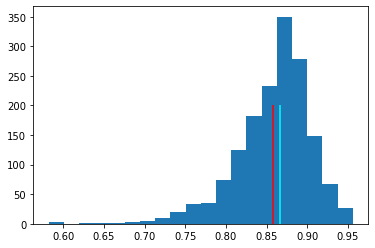

In [5]:
fig = plt.Figure((10,10))
ax = plt.axes()
ax.hist(avg,bins=20)
ax.vlines(total_avg,0,200,colors=(1,0,0))
ax.vlines(total_med,0,200,colors=(0,1,1))
plt.show()